In [17]:
# ─── Cell 1: Setup and Imports ────────────────────────────────────
import sys, os
# Add root path for module imports
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, project_root)

# Basic imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Feature extraction
from src.hsv import (
    extract_normalized_hsv_histogram,
    extract_lbp_histogram,
    extract_batch_features,
    extract_batch_hsv_lbp,
)

from skimage.feature import local_binary_pattern

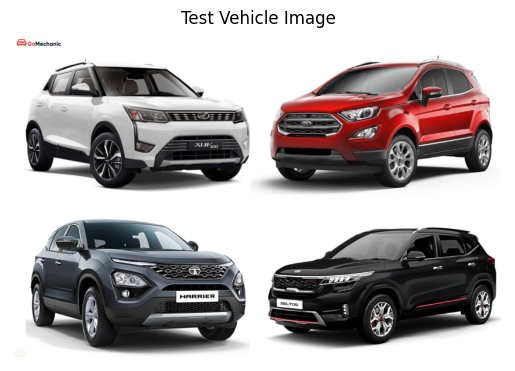

In [18]:
# ─── Cell 2: Load and Display a Sample Image ───────────────────────
image_path = "../Data/vehicle/cars/car10.jpg"  # Update path if needed
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)
plt.title("Test Vehicle Image")
plt.axis("off")
plt.show()

**Batch feature extraction**

- Extract HSV histogram features for all images in your dataset (both vehicle and non-vehicle folders).

- Store features along with corresponding labels (1 for vehicle, 0 for non-vehicle).

[HSV] Feature Shape: (512,)
First 10 HSV features:
 [0.09119964 0.05830807 0.03434365 0.02299907 0.02092105 0.0351487
 0.02808665 0.44983765 0.00059212 0.00365202]
Sum (should be ~1.0): 0.9999995


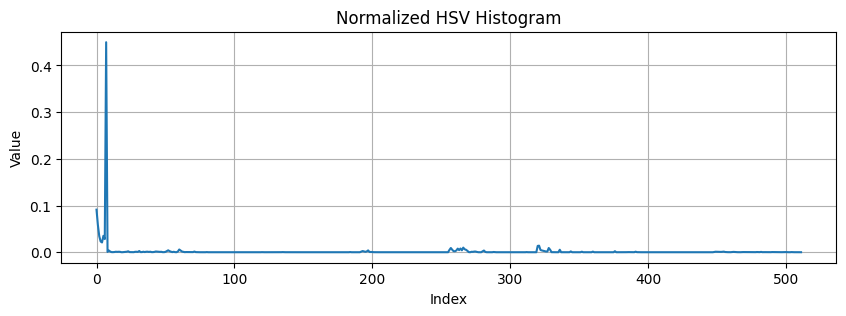

In [19]:
# ─── Cell 3: Extract and Show HSV Histogram ────────────────────────
hsv_features = extract_normalized_hsv_histogram(image)
print(f"[HSV] Feature Shape: {hsv_features.shape}")
print("First 10 HSV features:\n", hsv_features[:10])
print("Sum (should be ~1.0):", np.sum(hsv_features))

plt.figure(figsize=(10, 3))
plt.plot(hsv_features)
plt.title("Normalized HSV Histogram")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

**Texture Feature Extraction**
- Implement Local Binary Patterns (LBP)  
- Combine color + LBP features  

[LBP] Feature Shape: (256,)
First 10 LBP features:
 [0.01286612 0.03463735 0.01787539 0.05670396 0.05758825 0.13924066
 0.04212204 0.04206529 0.54086513 0.05603581]
Sum (should be ~1.0): 0.999999999999847


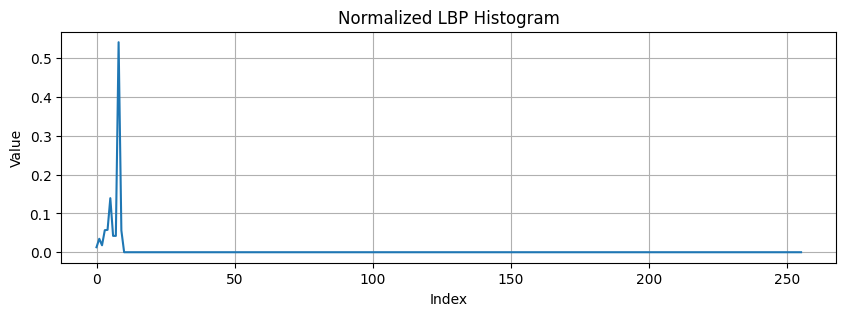

In [20]:
# ─── Cell 4: Extract and Show LBP Histogram ────────────────────────
lbp_features = extract_lbp_histogram(image)
print(f"[LBP] Feature Shape: {lbp_features.shape}")
print("First 10 LBP features:\n", lbp_features[:10])
print("Sum (should be ~1.0):", np.sum(lbp_features))

# Plotting the LBP Histogram
plt.figure(figsize=(10, 3))
plt.plot(lbp_features)
plt.title("Normalized LBP Histogram")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

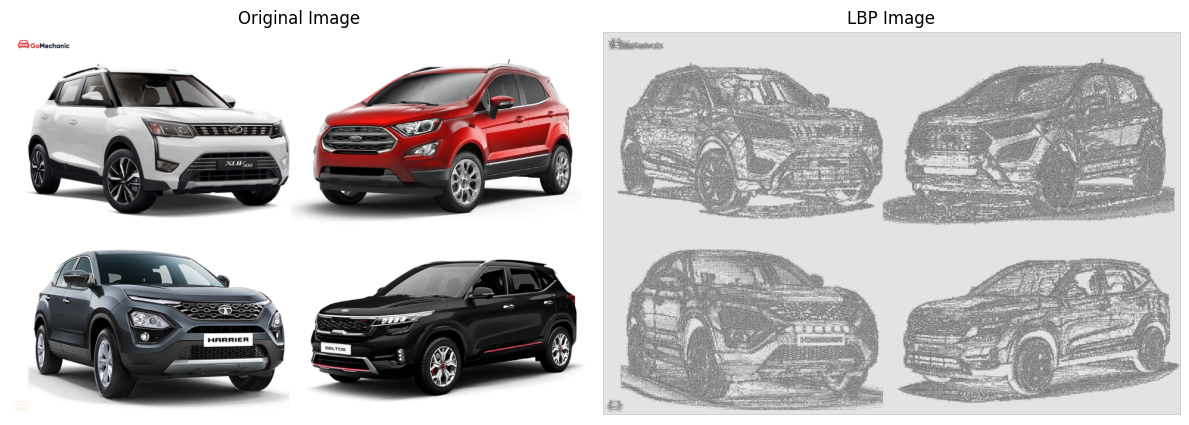

In [21]:
# ─── Cell 5: Display LBP Image ─────────────────────────────────────
# Compute the LBP image for visualization
P = 8  # Number of circularly symmetric neighbor set points
R = 1  # Radius
lbp_image = local_binary_pattern(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), P, R, method="uniform")

# Show the original and LBP image side by side
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(lbp_image, cmap='gray')
plt.title("LBP Image")
plt.axis("off")

plt.tight_layout()
plt.show()

In [22]:
# ─── Cell 6: Combined HSV + LBP Features ───────────────────────────
combined_features = np.hstack([hsv_features, lbp_features])
print(f"[Combined] Feature Shape: {combined_features.shape}")

[Combined] Feature Shape: (768,)


In [23]:
# ─── Cell 7: Batch Feature Extraction (HSV Only) ───────────────────
hsv_feats, hsv_labels = extract_batch_features("../Data")
print(f"[Batch HSV] Extracted {len(hsv_feats)} features")
print(f"[Batch HSV] Labels shape: {len(hsv_labels)}")

[Batch HSV] Extracted 1590 features
[Batch HSV] Labels shape: 1590


In [24]:
#─── Cell 7: Batch Feature Extraction (HSV + LBP) ──────────────────
X_hsv, X_lbp, y = extract_batch_hsv_lbp("../Data")
X_combined = np.hstack([X_hsv, X_lbp])
print(f"[Batch Combined] Feature Shape: {X_combined.shape}")
print(f"[Batch Combined] Label Shape: {y.shape}")

[Batch Combined] Feature Shape: (1590, 768)
[Batch Combined] Label Shape: (1590,)
